# Handling Categorical Missing data

## 1.Frequent Value Imputation<br> 2.Missing Categorical Imputation

### 1.Frequent Value Imputation When to use..?<br>1.Missing Completely at Random <br> 2.Missing Data Is Less than Or equal to 5%

#### Advantages:Easy to apply <br> Disadvantage:Change the distribution of data

#### 2.Missing Categorical Imputation<br> Advantages:USe Arbitary Value <br> Disadvantages:Generates Randommness inn Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [4]:
df=pd.read_csv("train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [5]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [7]:
df.shape


(1460, 3)

In [10]:
df.isnull().mean()*100
#FireplaceQ has most Null values in it which is 47%
#GarageQual has most Null values equal to 5.5%

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

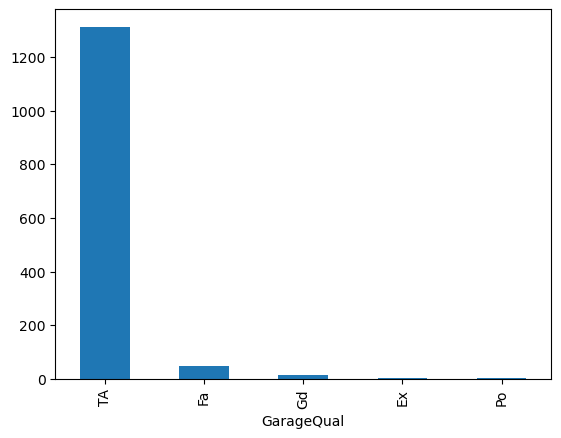

In [11]:
df["GarageQual"].value_counts().plot(kind="bar")

### from the above graph you can see that TA has the most values in data so we are replacing null values with it

In [13]:
df["GarageQual"].mode()
#We can see that for Garage Qual Mode is TA

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

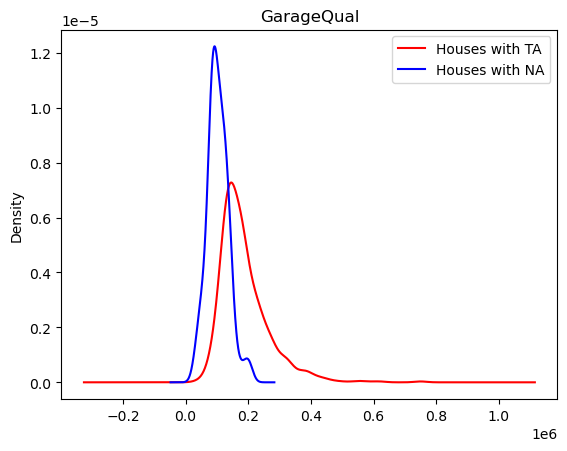

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df["GarageQual"]=="TA"]["SalePrice"].plot(kind="kde",color="red",ax=ax)

df[df["GarageQual"].isnull()]["SalePrice"].plot(kind="kde",color="blue",ax=ax)
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

#From the below graph we can see the difference between TA values And Null Values

In [31]:
temp=df[df["GarageQual"]=="TA"]["SalePrice"]

In [32]:
df["GarageQual"].fillna("TA",inplace=True)

<Axes: xlabel='GarageQual'>

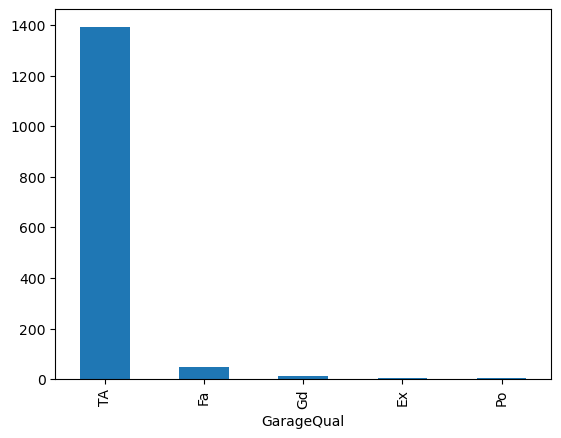

In [33]:
df["GarageQual"].value_counts().plot(kind="bar")

#### from the above Bar graph we can see tha NA  values fill with "TA" thats why the size of TA bar is increased , as compare to previous graph

Text(0.5, 1.0, 'GarageQual')

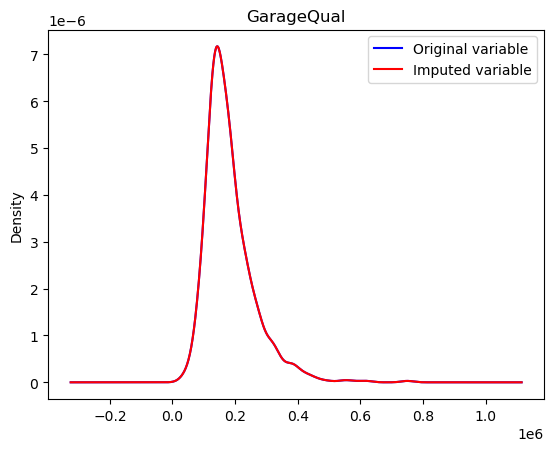

In [36]:
fig=plt.figure()
ax=plt.subplot(111)
temp.plot(kind="kde",ax=ax,color="blue")
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

##### from the above graph we can see the distribution of data after imputation of null values

<Axes: xlabel='FireplaceQu'>

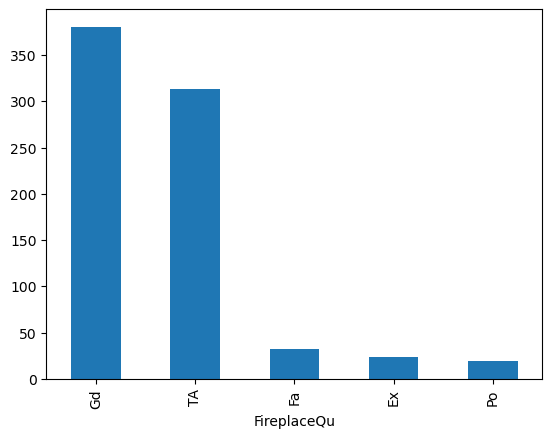

In [38]:
df["FireplaceQu"].value_counts().plot(kind="bar")

In [48]:
df["FireplaceQu"].mode()

0    GD
Name: FireplaceQu, dtype: object

#### from the above we can see that Mode for given column is GD, hence we will replace null values with Gd

#### Distribution of PD and Null Values

In [52]:
temp=df[df["FireplaceQu"]=='GD']['SalePrice']

In [53]:
df["FireplaceQu"].fillna("GD",inplace=True)

<Axes: xlabel='FireplaceQu'>

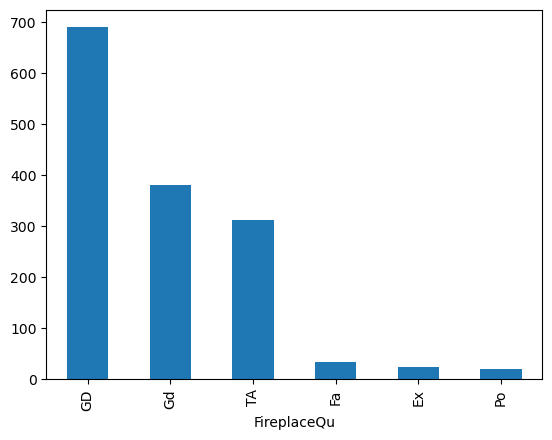

In [54]:
df["FireplaceQu"].value_counts().plot(kind="bar")

##### from the above graph we can see that size of Gd column is increses as null values are added to it

Text(0.5, 1.0, 'FireplaceQu')

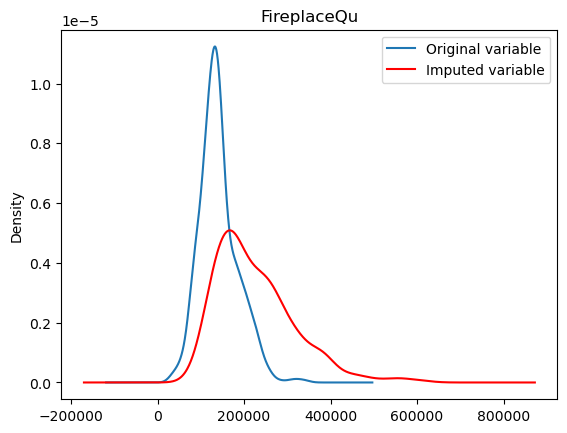

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

#### There is no Change in the distribution of data After Imputation

## Imputation Using Sklearn

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns=["SalePrice"]),df["SalePrice"],test_size=0.2,random_state=42)

In [57]:
imputer=SimpleImputer(strategy="most_frequent")

In [58]:
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [59]:
imputer.statistics_

array(['GD', 'TA'], dtype=object)

# Conclude